In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fraud_data = pd.read_csv('/content/drive/MyDrive/dfha fraud detection dataset/Fraud Detection Dataset.csv')

fraud_data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [ ]:
train_GB = fraud_data.memory_usage(deep = True).sum()/1024**3
print(f'The Fraud Data is using {train_GB:.2f} GB of memory storage')

The Fraud Data is using 7.69 GB of memory storage


In [ ]:
fraud_data.shape

(6000000, 32)

In [ ]:
fraud_data.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [ ]:
fraud_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Transaction ID                     6000000 non-null  int64  
 1   User ID                            6000000 non-null  int64  
 2   Transaction Amount                 6000000 non-null  float64
 3   Transaction Date and Time          6000000 non-null  object 
 4   Merchant ID                        6000000 non-null  int64  
 5   Payment Method                     6000000 non-null  object 
 6   Country Code                       6000000 non-null  object 
 7   Transaction Type                   6000000 non-null  object 
 8   Device Type                        6000000 non-null  object 
 9   IP Address                         6000000 non-null  object 
 10  Browser Type                       6000000 non-null  object 
 11  Operating System        

In [ ]:
fraud_data.duplicated().sum

fraud_data.shape

In [ ]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')

    return df

fraud_data = reduce_mem_usage(fraud_data)

Initial memory usage of dataframe is 7878.01 MB/7.69 GB
Memory usage after optimization is: 1370.91 MB/1.34 GB
Decreased by 82.6%


In [ ]:
fraud_data.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [ ]:
fraud_data.drop(columns=['Transaction ID', 'User ID', 'Transaction Date and Time', 'Merchant ID', 'IP Address', 'Transaction Status', "User's Device Location"], axis = 1, inplace=True)

In [22]:
unique_values = {}

for col in fraud_data.columns:
    if fraud_data[col].dtype == 'category':
        unique_values[col] = fraud_data[col].unique()

unique_values


{'Payment Method': ['ACH Transfer', '2Checkout', 'Google Wallet', 'Check', 'Worldpay', ..., 'Cash', 'JCB', 'Amazon Pay', 'American Express', 'Payoneer']
 Length: 40
 Categories (40, object): ['2Checkout', 'ACH Transfer', 'Afterpay', 'Alipay', ..., 'WeChat Pay',
                           'Western Union', 'Wire Transfer', 'Worldpay'],
 'Country Code': ['KOR', 'VNM', 'MEX', 'SGP', 'HKG', ..., 'RUS', 'ITA', 'POL', 'UAE', 'ZAF']
 Length: 40
 Categories (40, object): ['ARG', 'AUS', 'AUT', 'BEL', ..., 'UK', 'USA', 'VNM', 'ZAF'],
 'Transaction Type': ['Charity', 'Cashback', 'Reward', 'Purchase', 'Acquisition', ..., 'Service Charge', 'Scholarship', 'Loan', 'Membership', 'Deposit']
 Length: 38
 Categories (38, object): ['Acquisition', 'Admission', 'Auction', 'Bonus', ..., 'Subscription', 'Tax',
                           'Transfer', 'Withdrawal'],
 'Device Type': ['GPS Device', 'Medical Device', 'Vehicle Infotainment System', 'Kiosk', 'Smart Mirror', ..., 'Vending Machine', 'Self-Checkout Kiosk

In [23]:
fraud_data['Fraudulent Flag'].value_counts()

0    3000094
1    2999906
Name: Fraudulent Flag, dtype: int64

In [28]:
categorical_columns = fraud_data.select_dtypes(include=['category'])

categorical_columns

,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Occupation,User Gender,User Account Status,Transaction Time of Day,Transaction Currency,Transaction Purpose,User's Email Domain,Transaction Authentication Method
0,ACH Transfer,KOR,Charity,GPS Device,Links,Tizen,Industrial & Scientific,Doctor,Prefer Not to Say,Pro,Daytime,NOK,Consultation Fee,cox.co.uk,Bluetooth Authentication
1,2Checkout,VNM,Cashback,Medical Device,Beaker,Windows Server,Beauty & Cosmetics,Chemist,Genderqueer,Pending Approval,Daytime,EGP,Cashback Reward,gmail.com,NFC Tag
2,Google Wallet,MEX,Reward,Vehicle Infotainment System,Opera,Android,Real Estate,Nurse,Male,Pro,Daytime,MXN,Acquisition,rocketmail.com,Token
3,Check,SGP,Purchase,Kiosk,Konqueror,CentOS,Appliances,Nurse,Agender,Premium,Daytime,CLP,Loan Repayment,roadrunner.co.uk,Time-Based OTP
4,Worldpay,HKG,Acquisition,Smart Mirror,Basilisk,Ubuntu,Jewelry,Physicist,Male,Free,Daytime,RUB,Dividend Reinvestment,protonmail.co.uk,Password
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,Discover,SGP,Scholarship,Server,Chrome,Windows Mobile,Fitness & Nutrition,Plumber,Genderqueer,Standard,Daytime,CHF,Invoice Payment,aim.com,Retina Scan
5999996,Alipay,ZAF,Loan,Digital Camera,Safari,iOS,Appliances,Researcher,Other,Active,Nighttime,HUF,Membership,cox.net,Social Media Login
5999997,Afterpay,CAN,Service Charge,Barcode Scanner,Internet Explorer,Sailfish OS,Sporting Goods,Nurse,Agender,Pending Approval,Evening,HKD,Admission,live.co.uk,Mobile App Notification
5999998,JCB,UK,Fine,Robot,Waterfox,Chrome OS,Baby & Maternity,Biologist,Non-Binary,Unverified,Nighttime,AED,Expense Reimbursement,rediffmail.com,Authentication App


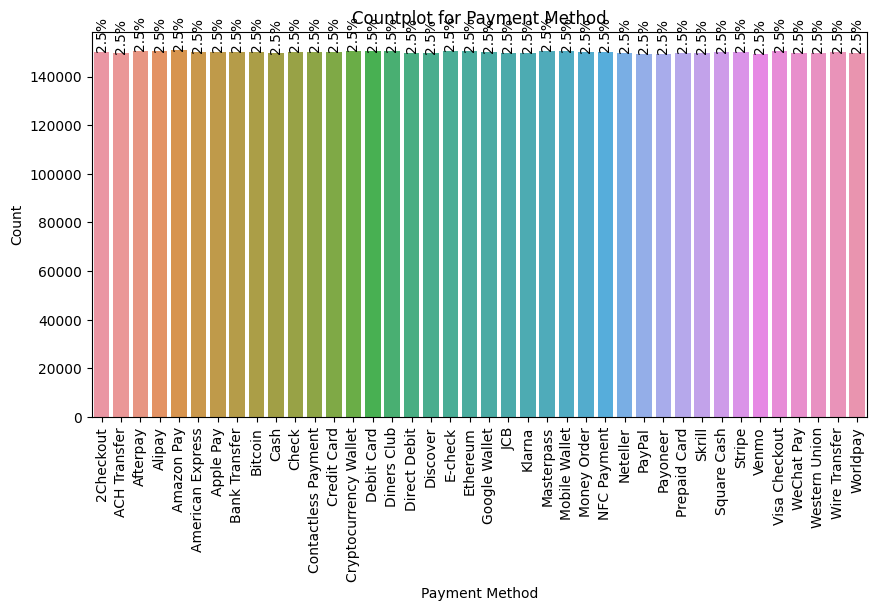

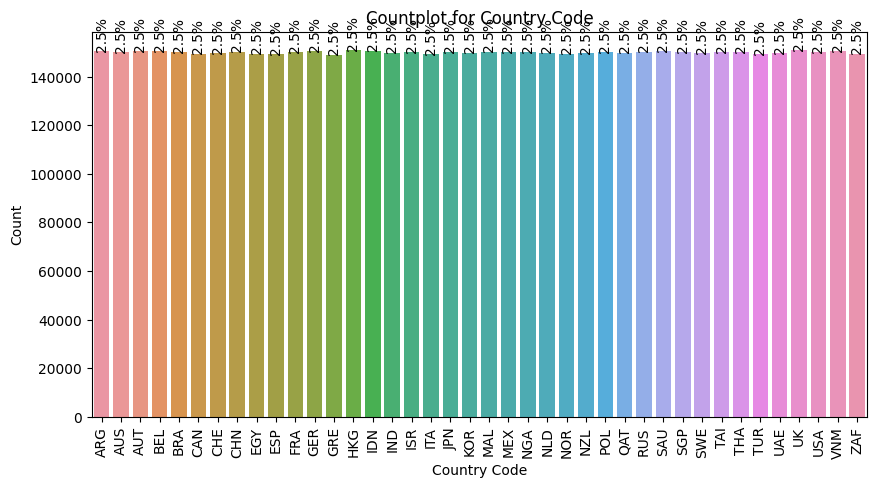

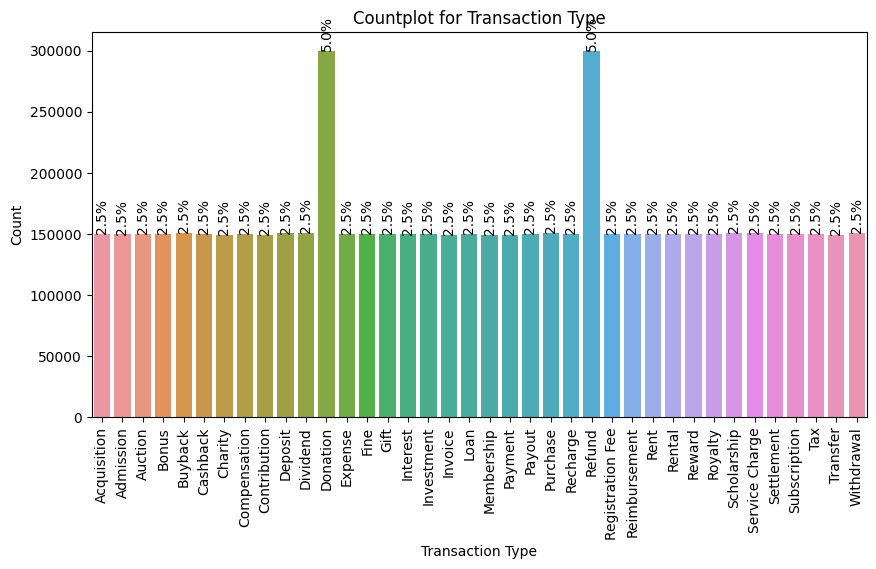

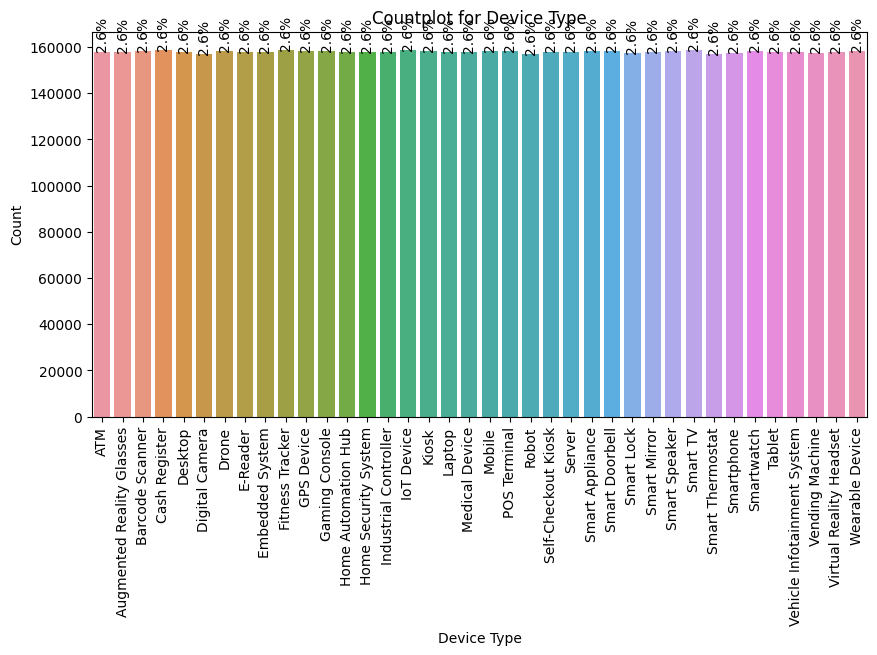

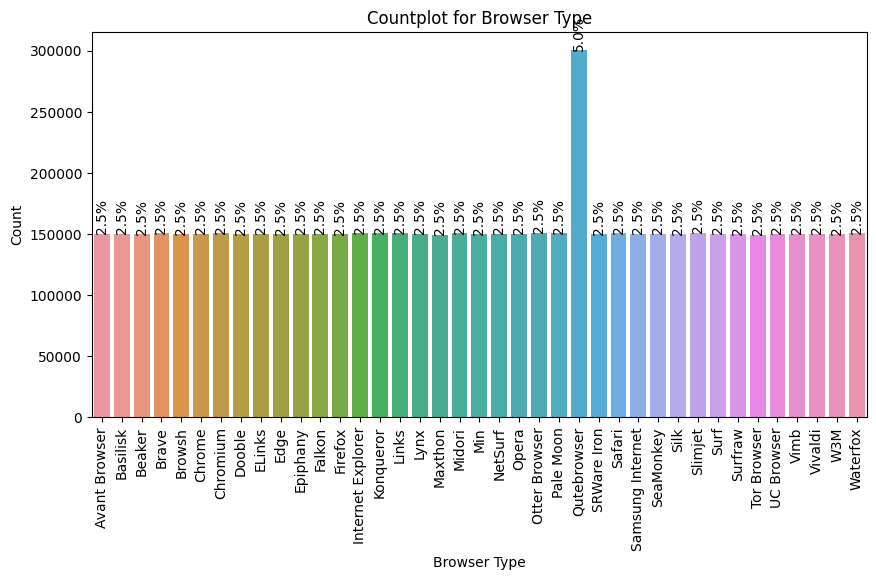

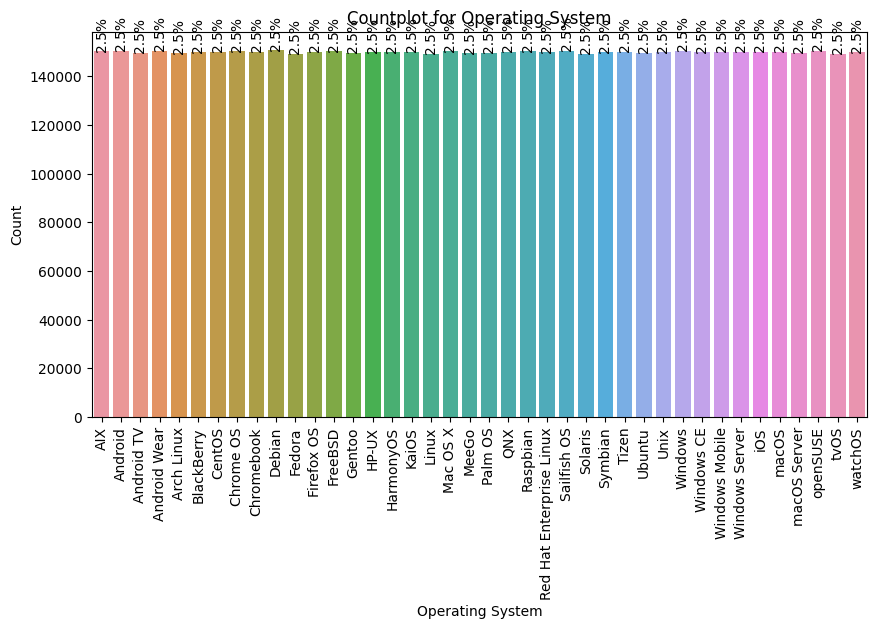

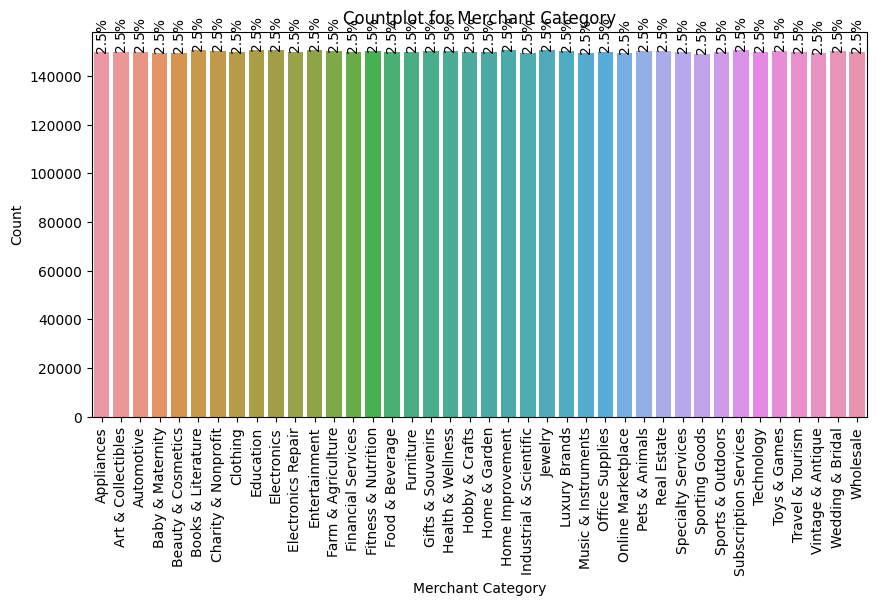

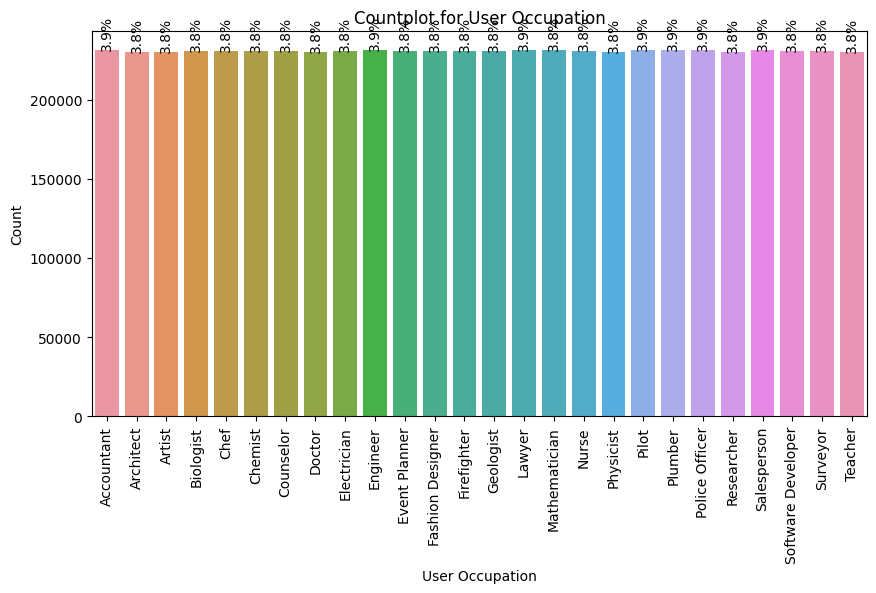

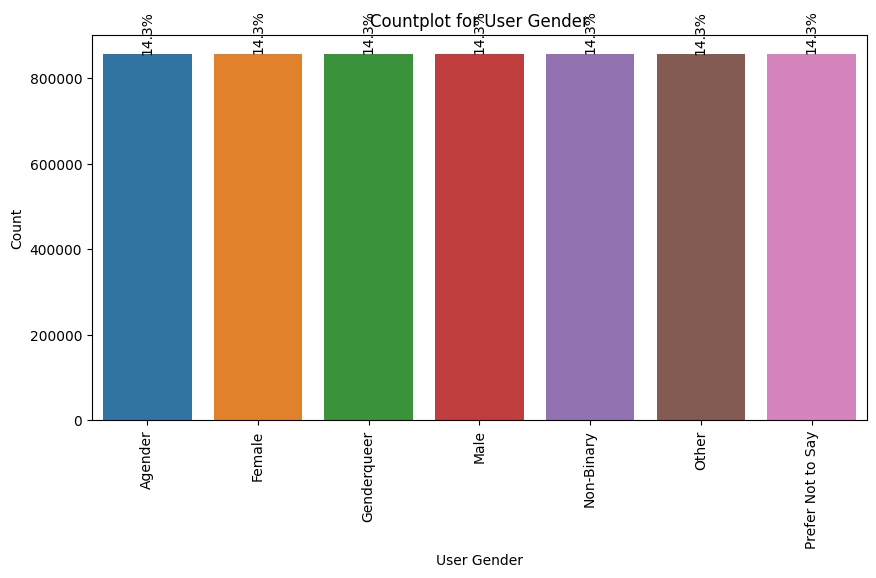

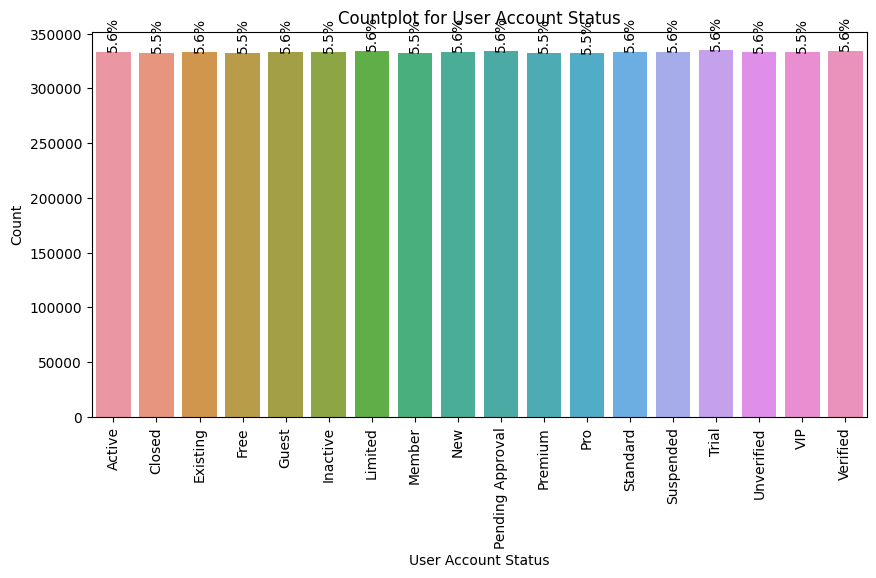

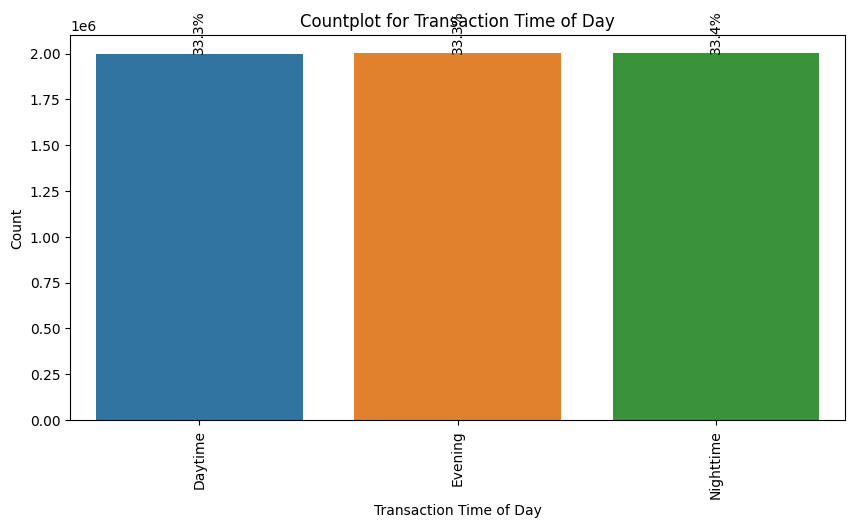

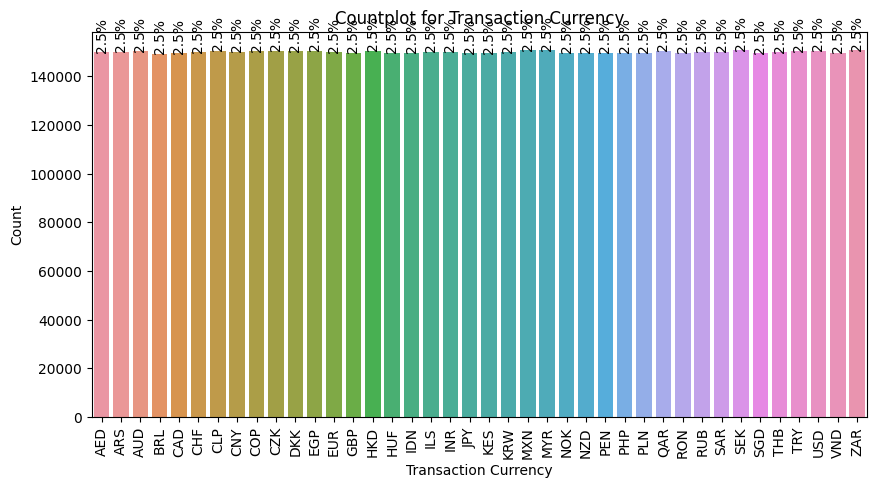

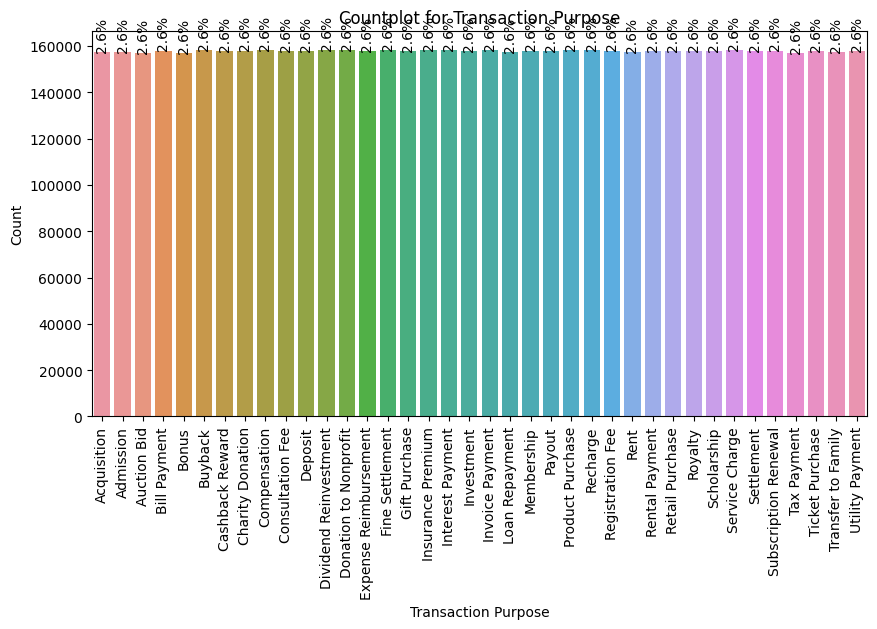

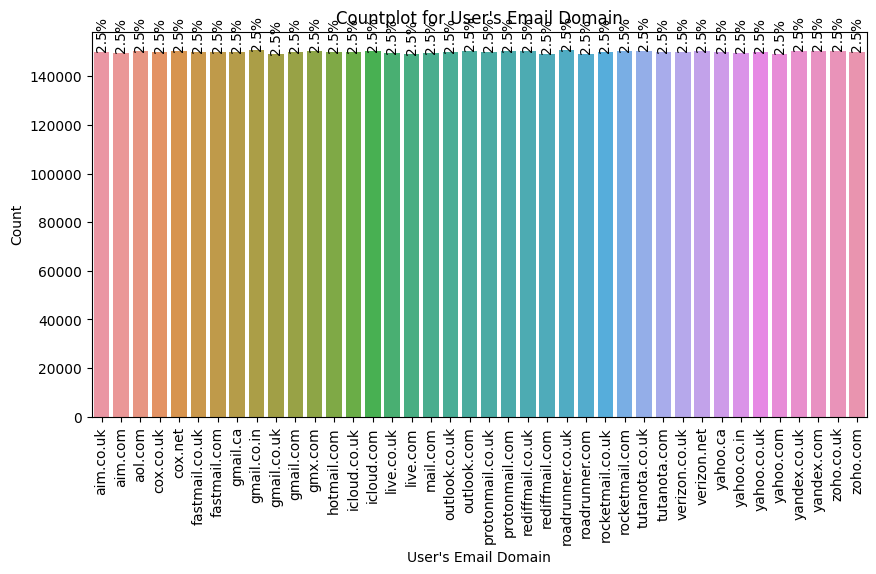

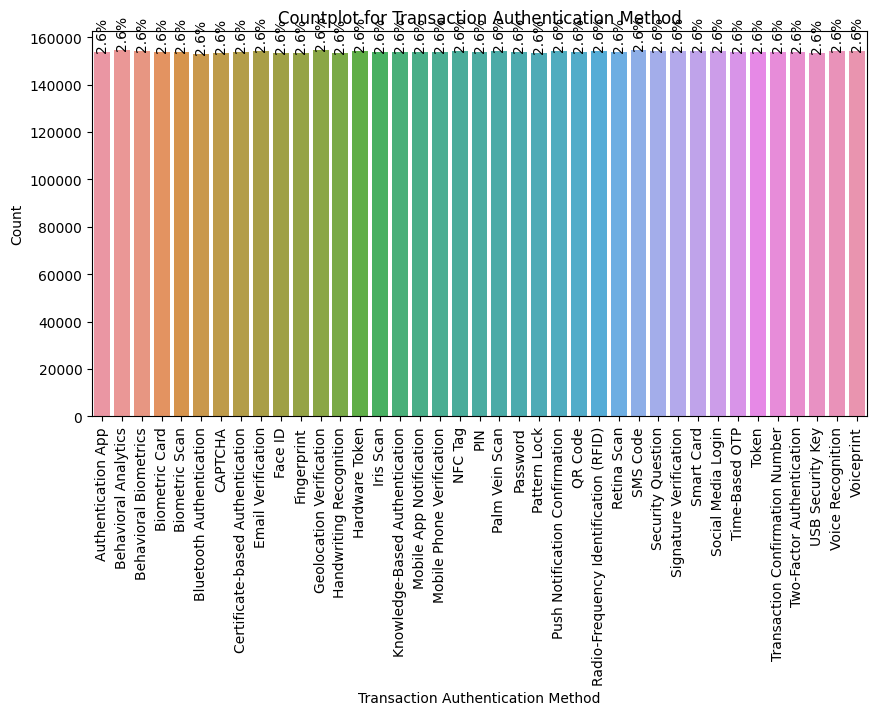

In [29]:
cat_cols = fraud_data.select_dtypes(include=['category'])

columns = cat_cols.columns

for column in columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=column, data=fraud_data)
    ax.set_title(f'Countplot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    # Annotate the percentage of each bar
    total = len(fraud_data[column])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=90)

    # Rotate the annotations by 90 degrees
    for t in ax.texts:
        t.set_rotation(90)

plt.show()

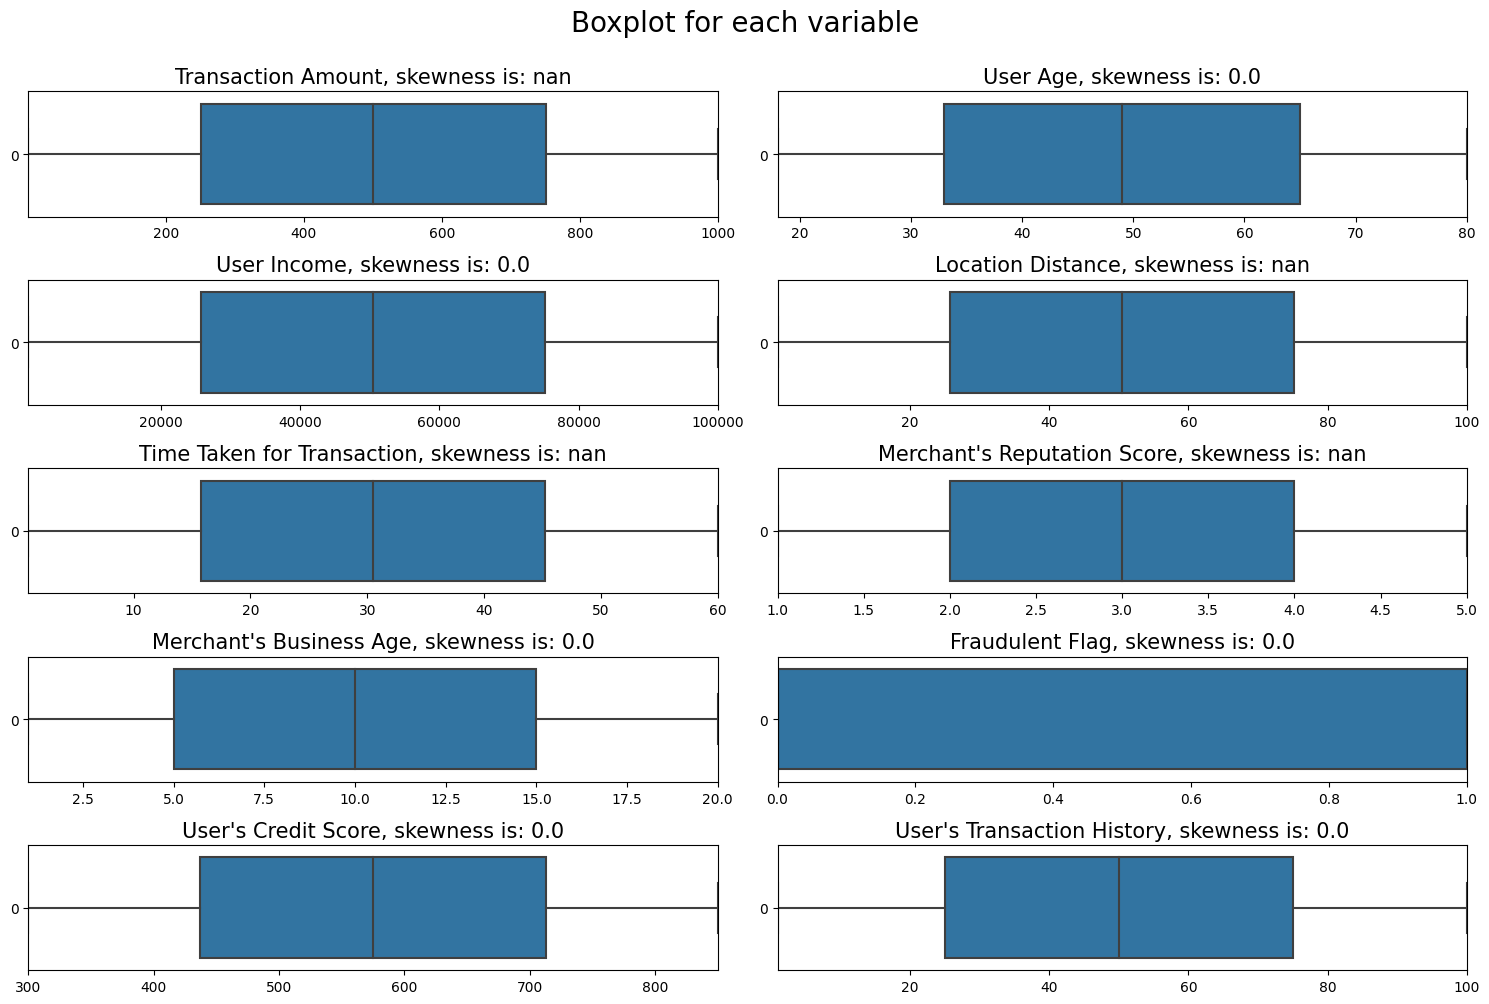

In [30]:
num_col = fraud_data[['Transaction Amount', 'User Age', 'User Income', 'Location Distance', 'Time Taken for Transaction', "Merchant's Reputation Score", "Merchant's Business Age", 'Fraudulent Flag', "User's Credit Score", "User's Transaction History" ]]

def fraud_data_boxplot(data,column):
    fig, ax = plt.subplots(5,2,figsize=(15,10))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])

fraud_data_boxplot(data=fraud_data, column=num_col)
plt.tight_layout()

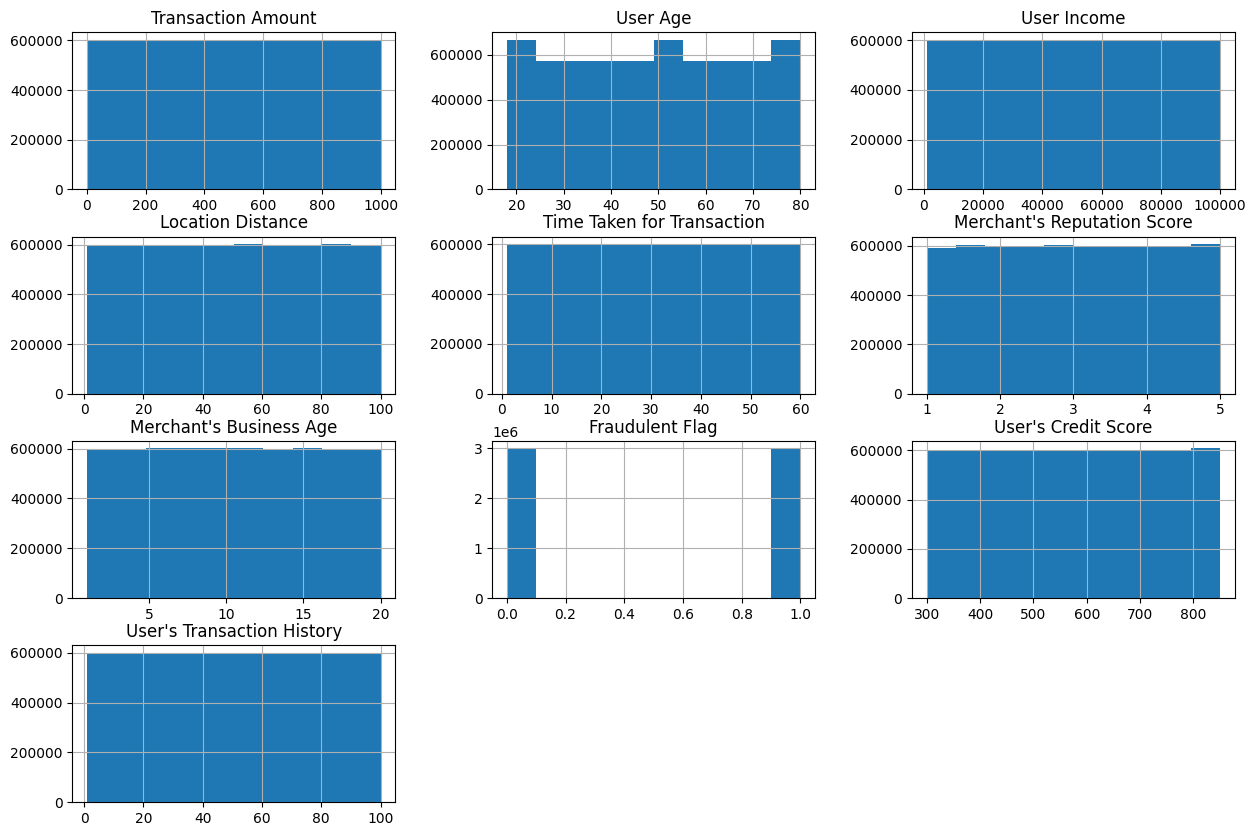

In [31]:
num_col.hist(figsize = (15,10))
plt.show()

<Figure size 1500x1000 with 0 Axes>

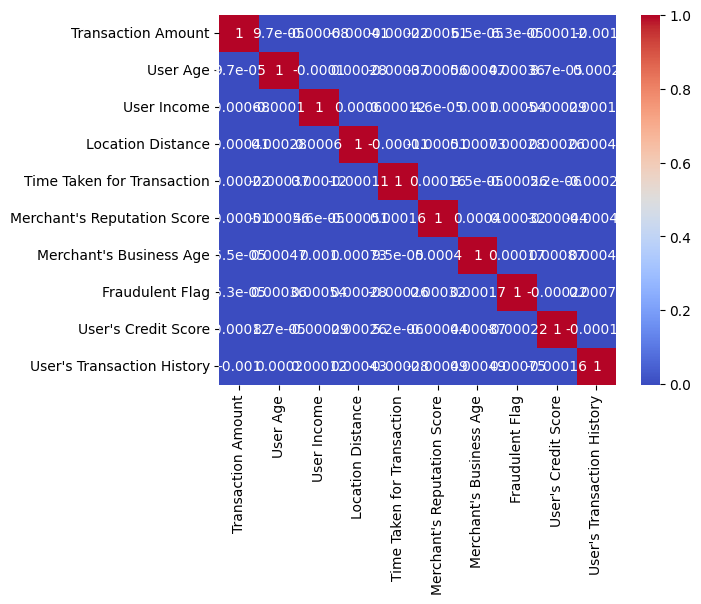

<Figure size 1500x1000 with 0 Axes>

In [32]:
sns.heatmap(num_col.corr(), annot=True, cmap="coolwarm")
plt.figure(figsize=(15,10))

In [33]:
# for column in num_col.columns:
#     sns.kdeplot(num_col[column], label=column)

# plt.xlabel('Kde-plot for Each Feature')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

In [34]:
# sns.pairplot(data = num_col, hue = 'Fraudulent Flag')
# plt.show()

In [35]:
# DATA PREPROCESSING

In [39]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
fraud_prep = fraud_data.copy()
label_encoder = LabelEncoder()

for col in fraud_prep.columns:
    if fraud_prep[col].dtype == 'category':
        fraud_prep[col] = label_encoder.fit_transform(fraud_prep[col])

In [40]:
scaler = MinMaxScaler()

numeric_cols = [col for col in fraud_prep.columns if col not in cat_cols]

fraud_prep[numeric_cols] = scaler.fit_transform(fraud_prep[numeric_cols])

fraud_prep.head()

,Transaction Amount,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Age,User Occupation,...,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,0.162287,1,19,6,10,15,27,22,0.806452,7,...,0,0.252525,0.427734,24,9,0.078182,3,0.105263,5,0.0
1,0.430180,0,38,5,18,2,33,4,0.064516,5,...,0,0.595960,0.737305,11,6,0.705455,10,0.631579,18,1.0
2,0.415165,20,21,29,34,21,1,29,0.854839,16,...,0,0.808081,0.702637,22,0,0.129091,27,0.315789,33,1.0
3,0.565566,10,30,22,16,14,6,0,0.967742,16,...,0,0.171717,0.417480,6,20,0.703636,24,0.736842,32,1.0
4,0.955455,39,13,0,27,1,28,23,0.209677,17,...,0,0.979798,0.547363,31,11,0.554545,20,0.842105,21,1.0


In [ ]:
fraud_prep['Transaction Time of Day'].unique()

In [41]:
X = fraud_prep.drop('Fraudulent Flag', axis = 1)

X.head()

,Transaction Amount,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Age,User Occupation,...,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method
0,0.162287,1,19,6,10,15,27,22,0.806452,7,...,0.393538,0,0.252525,0.427734,24,9,0.078182,3,0.105263,5
1,0.430180,0,38,5,18,2,33,4,0.064516,5,...,0.917373,0,0.595960,0.737305,11,6,0.705455,10,0.631579,18
2,0.415165,20,21,29,34,21,1,29,0.854839,16,...,0.895657,0,0.808081,0.702637,22,0,0.129091,27,0.315789,33
3,0.565566,10,30,22,16,14,6,0,0.967742,16,...,0.349576,0,0.171717,0.417480,6,20,0.703636,24,0.736842,32
4,0.955455,39,13,0,27,1,28,23,0.209677,17,...,0.893538,0,0.979798,0.547363,31,11,0.554545,20,0.842105,21


In [42]:
y = fraud_prep['Fraudulent Flag']

y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Fraudulent Flag, dtype: float32

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [46]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(n_estimators=50, random_state=42)
lgbm = lgb.LGBMClassifier()
ext = ExtraTreesClassifier(n_estimators=50, random_state=42)

In [48]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

qda = XGBClassifier(n_estimators=50, random_state=42)
qda.fit(X_train, y_train)
y_qda = qda.predict(X_test)

acc_score= accuracy_score(y_test, y_qda)
f1 = f1_score(y_test, y_qda, average='weighted')
recall= recall_score(y_test, y_qda, average='weighted')
precision= precision_score(y_test, y_qda, average='weighted')

AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

print("Accuracy Score is: ", np.mean(AccuracyScore))
print("F1 Score is: ", np.mean(f1score))
print("Recall Score is: ", np.mean(RecallScore))
print("Precision Score is: ", np.mean(PrecisionScore))
print("Precision Score is: ", np.mean(PrecisionScore))

confuison_matrix = confusion_matrix(y_true=y_test, y_pred=y_qda)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuison_matrix, display_labels=["Setosa", "Versicolor", 'Virginica'])
cm_display.plot()
plt.title("Confusion Matrix QuadraticDiscriminantAnalysis")

Accuracy Score is:  0.500095
F1 Score is:  0.5000913151812573
Recall Score is:  0.500095
Precision Score is:  0.5000949187999066
Precision Score is:  0.5000949187999066


NameError: ignored

In [ ]:
def modelling (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    model_accuracy = accuracy_score(y_test, y_preds)
    model_precision = precision_score(y_test, y_preds)

    return model_accuracy, model_precision

In [ ]:
accuracy = []
precision = []

for name,model in models.items():

    the_accuracy, the_precision = modelling(model, X_train, y_train, X_test, y_test)

    print ('For', name)
    print('Accuracy score:', the_accuracy)
    print('Precision score:', the_precision)

    accuracy.append(the_accuracy)
    precision.append(the_precision)

In [ ]:
model_performance = pd.DataFrame({'Algorithm':models.keys(), 'Accuracy': accuracy, 'Precision': precision})

model_performance